In [1]:
import numpy as np
import matplotlib.pyplot as plt
import odesolver as ode

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1. First, build a Runge-Kutta implementation of the three-body equations, using the same type of decomposition/rewriting process that you used to get the two-body equations in the previous problemset. Use an adaptive timestep integrator.**

**Test your program using the initial conditions that you derived previously for two of the stars, and starting a third star, of equal mass and at rest, several thousand units away. The binary star should be the same if the third is far enough away.**

Given the following system:

$$
\begin{aligned}
\ddot{\vec{r} }_1 &=& -G \left( m_2 \frac{\vec{r}_1 - \vec{r}_2}{ {|(\vec{r}_1 - \vec{r}_2)|}^3} + m_3 \frac{\vec{r}_1 - \vec{r}_3}{ {|(\vec{r}_1 - \vec{r}_3)|}^3} \right)\\
\ddot{\vec{r} }_2 &=& -G \left( m_1 \frac{\vec{r}_2 - \vec{r}_1}{ {|(\vec{r}_2 - \vec{r}_1)|}^3} + m_3 \frac{\vec{r}_2 - \vec{r}_3}{ {|(\vec{r}_2 - \vec{r}_3)|}^3} \right)\\
\ddot{\vec{r} }_3 &=& -G \left( m_1 \frac{\vec{r}_3 - \vec{r}_1}{ {|(\vec{r}_3 - \vec{r}_1)|}^3} + m_2 \frac{\vec{r}_3 - \vec{r}_2}{ {|(\vec{r}_3 - \vec{r}_2)|}^3} \right)\\
\end{aligned}
$$

(Where in this case $| \vec{r} |$ indicates the $\mathcal{L}_2$, or Euclidean norm as a measurement of distance.)

We can rewrite to the following form.

$$
\begin{aligned}
\dot{x}_1 &=& u_1\\
\dot{y}_1 &=& v_1\\
\dot{z}_1 &=& w_1\\
\ddot{x}_1 &=& -G \left( m_2 \frac{x_1 - x_2}{ {\left[{(x_1 - x_2)}^2 + {(y_1 - y_2)}^2 + {(z_1 - z_2)}^2\right]}^{(3/2)} } + m_3 \frac{x_1 - x_3}{ {\left[{(x_1 - x_3)}^2 + {(y_1 - y_3)}^2 + {(z_1 - z_3)}^2\right]}^{(3/2)} } \right)\\
\ddot{y}_1 &=& -G \left( m_2 \frac{y_1 - y_2}{ {\left[{(x_1 - x_2)}^2 + {(y_1 - y_2)}^2 + {(z_1 - z_2)}^2\right]}^{(3/2)} } + m_3 \frac{y_1 - y_3}{ {\left[{(x_1 - x_3)}^2 + {(y_1 - y_3)}^2 + {(z_1 - z_3)}^2\right]}^{(3/2)} } \right)\\
\ddot{z}_1 &=& -G \left( m_2 \frac{z_1 - z_2}{ {\left[{(x_1 - x_2)}^2 + {(y_1 - y_2)}^2 + {(z_1 - z_2)}^2\right]}^{(3/2)} } + m_3 \frac{z_1 - z_3}{ {\left[{(x_1 - x_3)}^2 + {(y_1 - y_3)}^2 + {(z_1 - z_3)}^2\right]}^{(3/2)} } \right)\\
\dot{x}_2 &=& u_2\\
\dot{y}_2 &=& v_2\\
\dot{z}_2 &=& w_2\\
\ddot{x}_2 &=& -G \left( m_1 \frac{x_2 - x_1}{ {\left[{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2 + {(z_2 - z_1)}^2\right]}^{(3/2)} } + m_3 \frac{x_2 - x_3}{ {\left[{(x_2 - x_3)}^2 + {(y_2 - y_3)}^2 + {(z_2 - z_3)}^2\right]}^{(3/2)} } \right)\\
\ddot{y}_2 &=& -G \left( m_1 \frac{y_2 - y_1}{ {\left[{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2 + {(z_2 - z_1)}^2\right]}^{(3/2)} } + m_3 \frac{y_2 - y_3}{ {\left[{(x_2 - x_3)}^2 + {(y_2 - y_3)}^2 + {(z_2 - z_3)}^2\right]}^{(3/2)} } \right)\\
\ddot{z}_2 &=& -G \left( m_1 \frac{z_2 - z_1}{ {\left[{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2 + {(z_2 - z_1)}^2\right]}^{(3/2)} } + m_3 \frac{z_2 - z_3}{ {\left[{(x_2 - x_3)}^2 + {(y_2 - y_3)}^2 + {(z_2 - z_3)}^2\right]}^{(3/2)} } \right)\\
\dot{x}_3 &=& u_3\\
\dot{y}_3 &=& v_3\\
\dot{z}_3 &=& w_3\\
\ddot{x}_3 &=& -G \left( m_1 \frac{x_3 - x_1}{ {\left[{(x_3 - x_1)}^2 + {(y_3 - y_1)}^2 + {(z_3 - z_1)}^2\right]}^{(3/2)} } + m_2 \frac{x_3 - x_2}{ {\left[{(x_3 - x_2)}^2 + {(y_3 - y_2)}^2 + {(z_3 - z_2)}^2\right]}^{(3/2)} } \right)\\
\ddot{y}_3 &=& -G \left( m_1 \frac{y_3 - y_1}{ {\left[{(x_3 - x_1)}^2 + {(y_3 - y_1)}^2 + {(z_3 - z_1)}^2\right]}^{(3/2)} } + m_2 \frac{y_3 - y_2}{ {\left[{(x_3 - x_2)}^2 + {(y_3 - y_2)}^2 + {(z_3 - z_2)}^2\right]}^{(3/2)} } \right)\\
\ddot{z}_3 &=& -G \left( m_1 \frac{z_3 - z_1}{ {\left[{(x_3 - x_1)}^2 + {(y_3 - y_1)}^2 + {(z_3 - z_1)}^2\right]}^{(3/2)} } + m_2 \frac{z_3 - z_2}{ {\left[{(x_3 - x_2)}^2 + {(y_3 - y_2)}^2 + {(z_3 - z_2)}^2\right]}^{(3/2)} } \right)\\
\end{aligned}
$$


We can express this with code.

In [2]:
def gen_orbit(g=1, m1=0.5, m2=0.5, m3=0.5):
    def orbit(t, y):
        """
        Three body problem.
        y -> x1, y1, z1,
             u1, v1, w1,
             x2, y2, z2,
             u2, v2, w2,
             x3, y3, z3,
             u3, v3, w3
        """
        # All position vectors
        positions = np.array([y[:3], y[6:9], y[12:15]])
        # All velocity vectors
        velocities = np.array([y[3:6], y[9:12], y[15:18]])
        # Distances => [0 to 1, 1 to 2, 2 to 0]
        distances = np.array([np.linalg.norm(positions[i] - positions[(i + 1) % 3])
                              for i in range(3)])**3
        return np.array([
                velocities[0][0],
                velocities[0][1],
                velocities[0][2],
                -g * (m2 * ((positions[0][0] - positions[1][0]) / distances[0]) +
                      m3 * ((positions[0][0] - positions[2][0]) / distances[2])),
                -g * (m2 * ((positions[0][1] - positions[1][1]) / distances[0]) +
                      m3 * ((positions[0][1] - positions[2][1]) / distances[2])),
                -g * (m2 * ((positions[0][2] - positions[1][2]) / distances[0]) +
                      m3 * ((positions[0][2] - positions[2][2]) / distances[2])),
                velocities[1][0],
                velocities[1][1],
                velocities[1][2],
                -g * (m1 * ((positions[1][0] - positions[0][0]) / distances[0]) +
                      m3 * ((positions[1][0] - positions[2][0]) / distances[1])),
                -g * (m1 * ((positions[1][1] - positions[0][1]) / distances[0]) +
                      m3 * ((positions[1][1] - positions[2][1]) / distances[1])),
                -g * (m1 * ((positions[1][2] - positions[0][2]) / distances[0]) +
                      m3 * ((positions[1][2] - positions[2][2]) / distances[1])),
                velocities[2][0],
                velocities[2][1],
                velocities[2][2],
                -g * (m1 * ((positions[2][0] - positions[0][0]) / distances[2]) +
                      m2 * ((positions[2][0] - positions[1][0]) / distances[1])),
                -g * (m1 * ((positions[2][1] - positions[0][1]) / distances[2]) +
                      m2 * ((positions[2][1] - positions[1][1]) / distances[1])),
                -g * (m1 * ((positions[2][2] - positions[0][2]) / distances[2]) +
                      m2 * ((positions[2][2] - positions[1][2]) / distances[1]))
                ])
    return orbit

def midpoint(points):
    """ Returns midpoint between arbitrary number of points """
    return np.sum(points, axis=0) / len(points)

def plotdata(data, npoints):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    for i in range(npoints):
        # Plot each mass trajectory
        ax.plot(data[:, i * 6], data[:, (i * 6) + 1], label=r'$m{}$'.format(i))
        # Plot Mass labels and lines
        ax.annotate(r'$m{}$'.format(i),
                   xy=(data[-1, i * 6], data[-1, (i * 6) + 1]), xycoords='data',
                   xytext=(data[-100, i * 6], data[-100, (i * 6) + 1]), textcoords='data',
                   size=10,
                   arrowprops=dict(arrowstyle='simple',
                                   fc='black',
                                   connectionstyle='arc3'))
        ax.scatter([data[-1, i * 6] for i in range(npoints)],
                   [data[-1, (i * 6) + 1] for i in range(npoints)], s=50)
    # Plot midpoint trajectory
    centerline = midpoint([data[:, (i * 6):((i * 6) + 3)] for i in range(npoints)])
    ax.plot(centerline[:, 0], centerline[:, 1], 'k-', label='Center of Mass')
    ax.scatter(centerline[-1, 0], centerline[-1, 1], marker='x')
    # Legend
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0.)
    plt.show()

We can test this with our previous problem and note that the system is the same.

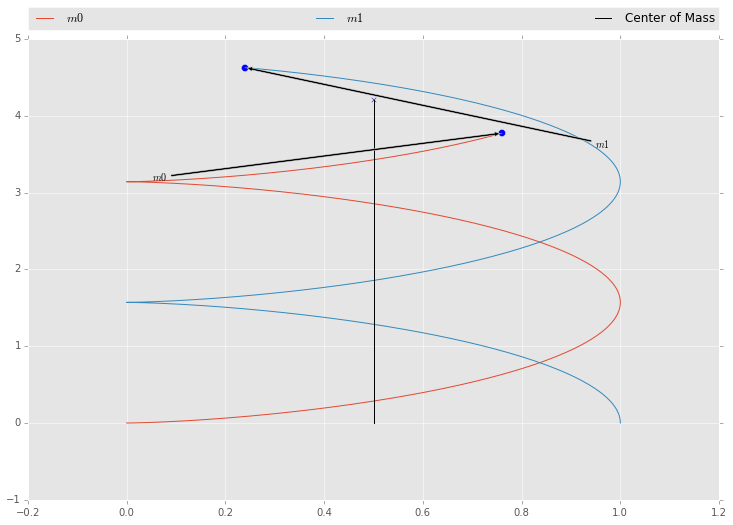

In [3]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        1, 0, 0,    # m2 position
        0, 1, 0,     # m2 velocity
        0, 1e9, 0,    # m3 position
        0, 0, 0     # m3 velocity
        ], dtype=np.float64)

data = ode.ark4(gen_orbit(), 0, initial_state, 0.001, 500, error=1e-10)

plotdata(data, 2)

**2. In the provided picture, the star whose mass is equal to that of each of the other two stars, sails into the binary from the right, along its centerline.**

**Start the binary at the initial conditions you derived previously and the other star 20 units away on the positive $y$ axis, moving directly towards the binary at $0.15$ units per second.**

**Run an integration of the three-body equations with these initial conditions. Plot the results in physical space. Does this look like the picture? Why or why not?**

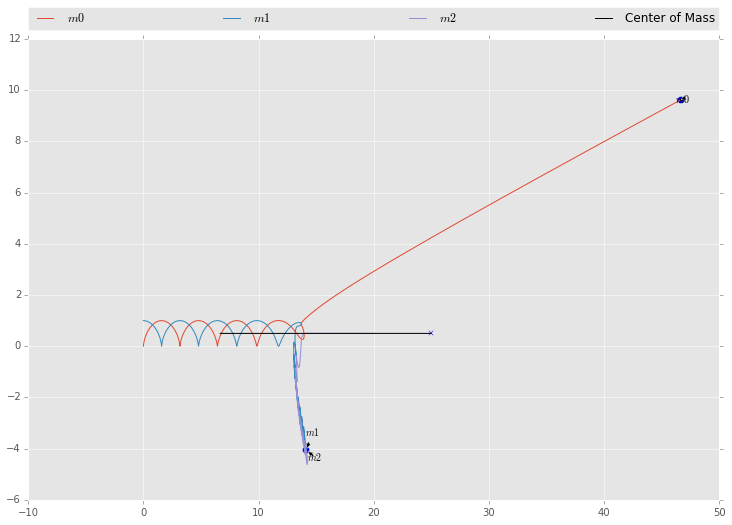

In [4]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        0, 1, 0,    # m2 position
        1, 0, 0,     # m2 velocity
        20, 0.5, 0,    # m3 position
        -0.15, 0, 0     # m3 velocity
        ], dtype=np.float64)

data = ode.ark4(gen_orbit(), 0, initial_state, 1e-4, int(2e3), error=1e-5)
plotdata(data, 3)

**3. Play with the true anomaly, and describe the interactions you see. Ideally you'll duplicate the picture, but other stuff can happen too.**

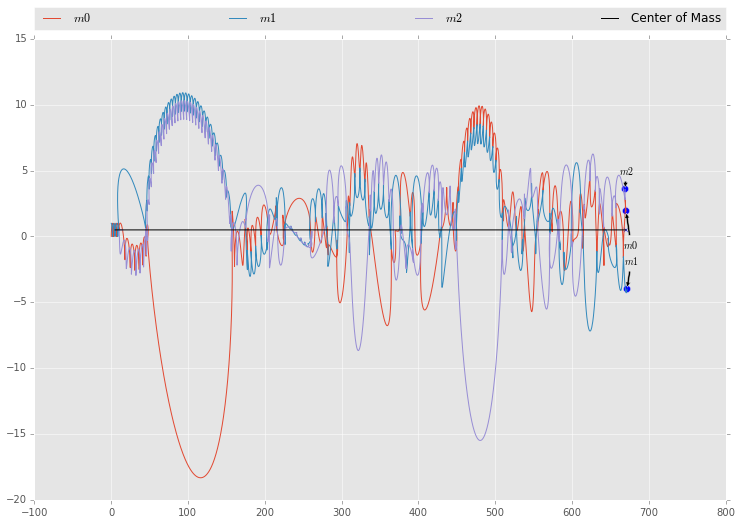

In [5]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        0, 1, 0,    # m2 position
        1, 0, 0,     # m2 velocity
        15, 0.5, 0,    # m3 position
        -0.15, 0, 0     # m3 velocity
        ], dtype=np.float64)

data = ode.ark4(gen_orbit(), 0, initial_state, 1e-4, int(1e4), error=1e-5)
plotdata(data, 3)

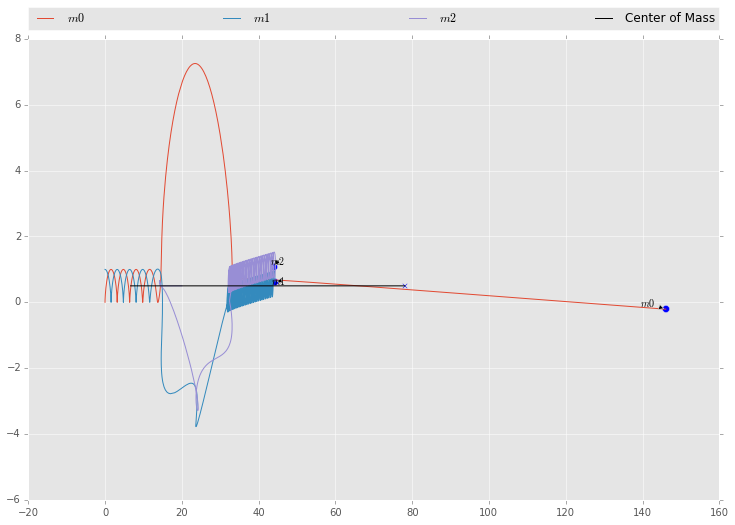

In [6]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        0, 1, 0,    # m2 position
        1, 0, 0,     # m2 velocity
        20, 0.5, 0,    # m3 position
        -0.1, 0, 0     # m3 velocity
        ], dtype=np.float64)

data = ode.ark4(gen_orbit(), 0, initial_state, 1e-4, int(2e3), error=1e-5)
plotdata(data, 3)

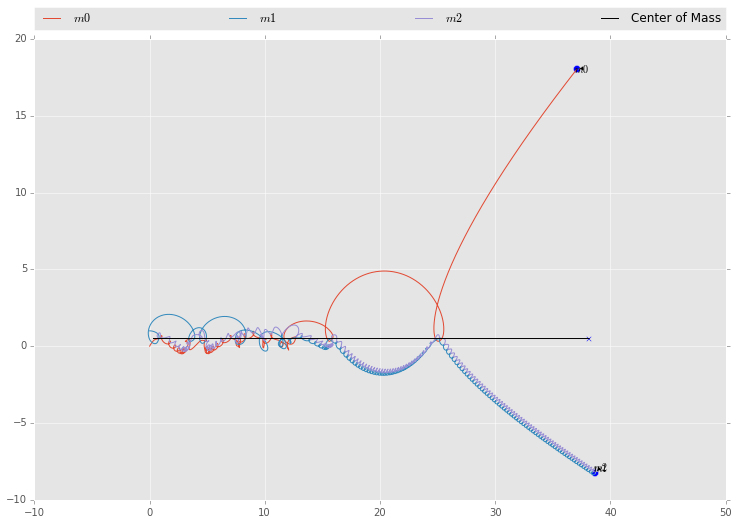

In [7]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        0, 1, 0,    # m2 position
        1, 0, 0,     # m2 velocity
        1, 0.5, 0,    # m3 position
        -0.15, 0, 0     # m3 velocity
        ], dtype=np.float64)

data = ode.ark4(gen_orbit(), 0, initial_state, 1e-4, int(1e4), error=1e-5)
plotdata(data, 3)

Now let's play around with changing the gravity and mass of the particles.

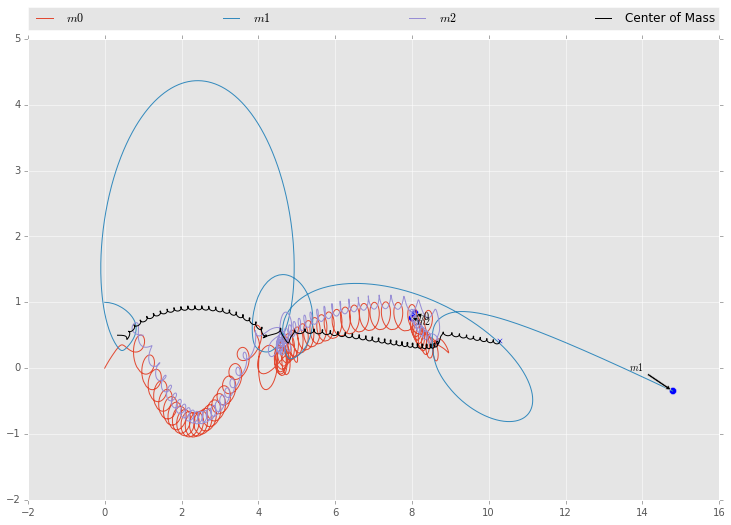

In [8]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        0, 1, 0,    # m2 position
        1, 0, 0,     # m2 velocity
        1, 0.5, 0,    # m3 position
        -0.15, 0, 0     # m3 velocity
        ], dtype=np.float64)

data = ode.ark4(gen_orbit(g=1, m1=0.5, m2=0.5, m3=1),
                0, initial_state, 1e-4, int(3e3), error=1e-5)
plotdata(data, 3)

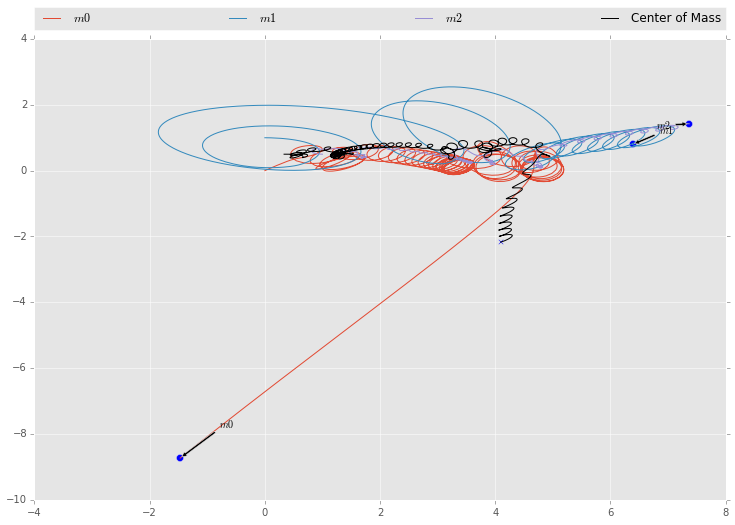

In [9]:
initial_state = np.array([
        0, 0, 0,    # m1 position
        0, 0, 0,    # m1 velocity
        0, 1, 0,    # m2 position
        1, 0, 0,     # m2 velocity
        1, 0.5, 0,    # m3 position
        -0.15, 0, 0     # m3 velocity
        ], dtype=np.float64)

data = ode.ark4(gen_orbit(g=1, m1=0.1, m2=0.25, m3=1),
                0, initial_state, 1e-4, int(3e3), error=1e-5)
plotdata(data, 3)